In [293]:
#Imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
import json
import hvplot.pandas
import plotly.express as px

In [294]:
# Load .env enviroment variables
load_dotenv()
AlphaVantageKey = os.getenv("ALPHA_VANTAGE_KEY") 

In [295]:
# Set up Panel Plotly extension
pn.extension('plotly')

In [296]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [297]:
#Get stock data
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-19", tz="America/New_York").isoformat()

# Set the ticker information
tickers = input("Please enter stock ticker\n ")

# Get 3 year's worth of historical price data
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker

Please enter stock ticker
  SNAP


C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:18: DeprecatedWarning:

get_barset is deprecated as of v1.0.0. Use get_bars instead



SNAP                                   
                            open    high     low    close    volume
time                                                               
2020-05-01 00:00:00-04:00  17.00  17.300  16.530  16.7900  53084583
2020-05-04 00:00:00-04:00  16.60  17.190  16.530  17.1000  33704260
2020-05-05 00:00:00-04:00  17.17  17.755  17.122  17.5050  48613574
2020-05-06 00:00:00-04:00  17.02  17.820  17.010  17.3200  48423440
2020-05-07 00:00:00-04:00  17.60  18.170  17.530  18.1300  61903484
...                          ...     ...     ...      ...       ...
2022-01-12 00:00:00-05:00  43.81  44.340  42.060  42.7300  11750323
2022-01-13 00:00:00-05:00  40.65  41.460  38.260  38.3684  29840192
2022-01-14 00:00:00-05:00  37.69  38.330  36.560  38.0300  23556237
2022-01-18 00:00:00-05:00  36.91  36.985  35.620  35.7400  33025228
2022-01-19 00:00:00-05:00  36.07  36.480  34.760  35.0500  21603614

[434 rows x 5 columns]

In [298]:
df_ticker.iloc[:,3]

time
2020-05-01 00:00:00-04:00    16.7900
2020-05-04 00:00:00-04:00    17.1000
2020-05-05 00:00:00-04:00    17.5050
2020-05-06 00:00:00-04:00    17.3200
2020-05-07 00:00:00-04:00    18.1300
                              ...   
2022-01-12 00:00:00-05:00    42.7300
2022-01-13 00:00:00-05:00    38.3684
2022-01-14 00:00:00-05:00    38.0300
2022-01-18 00:00:00-05:00    35.7400
2022-01-19 00:00:00-05:00    35.0500
Name: (SNAP, close), Length: 434, dtype: float64

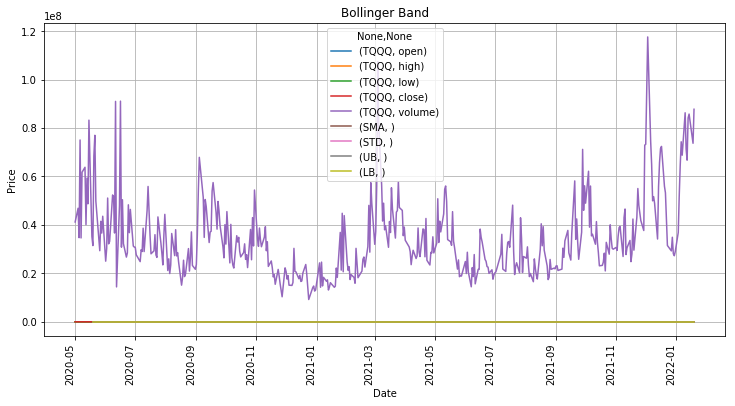

TQQQ                                       \
                             open     high     low     close    volume   
time                                                                     
2022-01-12 00:00:00-05:00  153.91  155.930  149.88  152.6305  66713757   
2022-01-13 00:00:00-05:00   77.13   77.550   70.02   70.6000  84112566   
2022-01-14 00:00:00-05:00   69.09   72.065   69.00   71.9100  85733795   
2022-01-18 00:00:00-05:00   68.50   69.720   66.06   66.6400  73677344   
2022-01-19 00:00:00-05:00   67.31   68.710   64.16   64.3384  87716264   

                                 SMA       STD         UB         LB  
                                                                      
time                                                                  
2022-01-12 00:00:00-05:00  44.709231  2.841961  50.393152  39.025309  
2022-01-13 00:00:00-05:00  43.918338  3.074976  50.068290  37.768387  
2022-01-14 00:00:00-05:00  43.173723  3.247482  49.668687  36.678759  
2022-01-18 00:00:00-05:00  42.302954  3.615403  49.533760  35.072148  
2022-01-19 00:00:00-05:00  41.305262  3.694978  48.695217  33.915306

In [299]:
#Calculate Bollinger Bands
#df['SMA']=df['close'].rolling(window=13).mean()
#df['STD']=df['close'].rolling(window=13).std()
df['SMA']=df_ticker.iloc[:,3].rolling(window=13).mean()
df['STD']=df_ticker.iloc[:,3].rolling(window=13).std()

df['UB']=df['SMA']+(df['STD']*2)
df['LB']=df['SMA']-(df['STD']*2)
#cl=['Close', 'SMA', 'UB', 'LB']
df.plot(figsize=(12.2,6.4))
plt.title('Bollinger Band')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
df.tail()

C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated

NameError: name 'fig2' is not defined

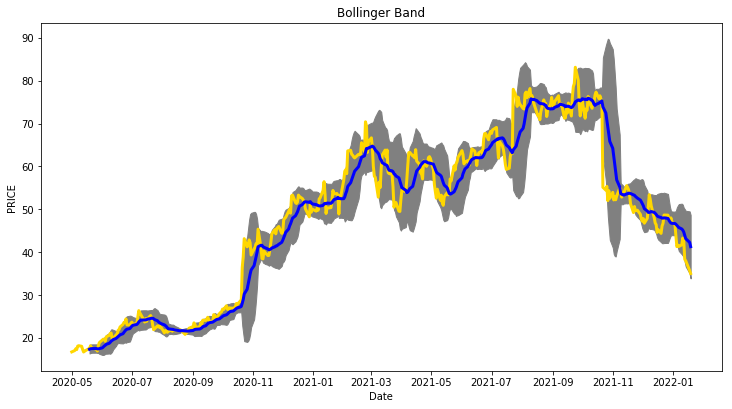

In [300]:
#Ploting bollinger band

fig1=plt.figure(figsize=(12.2,6.4))
ax=fig1.add_subplot(1,1,1)
x_axis=df.index
ax.fill_between(x_axis, df['UB'], df['LB'], color='grey')
ax.plot(x_axis, df_ticker.iloc[:,3], color='gold', lw=3, label='close price')
ax.plot(x_axis, df['SMA'], color='blue', lw=3, label='SMA')
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('PRICE')
fig2.xticks(rotation=90)
ax.legend()
fig2.show()

In [301]:
# Define RSI function

def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df_ticker.iloc[:,3].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [302]:
df_ticker['RSI'] = rsi(df_ticker)
df_ticker['RSI'].dropna().head(20)
df_ticker

SNAP                                           RSI
                            open    high     low    close    volume           
time                                                                          
2020-05-01 00:00:00-04:00  17.00  17.300  16.530  16.7900  53084583        NaN
2020-05-04 00:00:00-04:00  16.60  17.190  16.530  17.1000  33704260        NaN
2020-05-05 00:00:00-04:00  17.17  17.755  17.122  17.5050  48613574        NaN
2020-05-06 00:00:00-04:00  17.02  17.820  17.010  17.3200  48423440        NaN
2020-05-07 00:00:00-04:00  17.60  18.170  17.530  18.1300  61903484        NaN
...                          ...     ...     ...      ...       ...        ...
2022-01-12 00:00:00-05:00  43.81  44.340  42.060  42.7300  11750323  38.174894
2022-01-13 00:00:00-05:00  40.65  41.460  38.260  38.3684  29840192  29.437512
2022-01-14 00:00:00-05:00  37.69  38.330  36.560  38.0300  23556237  28.885120
2022-01-18 00:00:00-05:00  36.91  36.985  35.620  35.7400  33025228  25.410208
2022-01-19 00:00:00-05:00  36.07  36.480  34.760  35.0500  21603614  24.455555

[434 rows x 6 columns]

In [303]:
plt.show()

In [304]:
#Pull stock metrics from Alphavantage. NOTE: Doesn't appear to work with ETFs and funds, only stocks


# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=OVERVIEW&symbol=' + tickers +'&apikey=' + AlphaVantageKey
r = requests.get(url)
data = r.json()

data

{'Symbol': 'SNAP',
 'AssetType': 'Common Stock',
 'Name': 'Snap Inc',
 'Description': 'Snap Inc. is a camera company in the United States and internationally. The company is headquartered in Santa Monica, California.',
 'CIK': '1564408',
 'Exchange': 'NYSE',
 'Currency': 'USD',
 'Country': 'USA',
 'Sector': 'TECHNOLOGY',
 'Industry': 'SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING, ETC.',
 'Address': '2772 DONALD DOUGLAS, LOOP NORTH, SANTA MONICA, CA, US',
 'FiscalYearEnd': 'December',
 'LatestQuarter': '2021-12-31',
 'MarketCapitalization': '81990762000',
 'EBITDA': '-1018182976',
 'PERatio': 'None',
 'PEGRatio': '-0.31',
 'BookValue': '2.143',
 'DividendPerShare': '0',
 'DividendYield': '0',
 'EPS': '-0.408',
 'RevenuePerShareTTM': '2.44',
 'ProfitMargin': '-0.167',
 'OperatingMarginTTM': '-0.205',
 'ReturnOnAssetsTTM': '-0.0801',
 'ReturnOnEquityTTM': '-0.221',
 'RevenueTTM': '3730485000',
 'GrossProfitTTM': '1324121000',
 'DilutedEPSTTM': '-0.408',
 'QuarterlyEarningsGrowthYOY': '0

In [ ]:
## Need to find a way to display the relevant lines above

In [311]:
## Plot time trend data x = time , y = closing price
df_ticker

SNAP                                           RSI
                            open    high     low    close    volume           
time                                                                          
2020-05-01 00:00:00-04:00  17.00  17.300  16.530  16.7900  53084583        NaN
2020-05-04 00:00:00-04:00  16.60  17.190  16.530  17.1000  33704260        NaN
2020-05-05 00:00:00-04:00  17.17  17.755  17.122  17.5050  48613574        NaN
2020-05-06 00:00:00-04:00  17.02  17.820  17.010  17.3200  48423440        NaN
2020-05-07 00:00:00-04:00  17.60  18.170  17.530  18.1300  61903484        NaN
...                          ...     ...     ...      ...       ...        ...
2022-01-12 00:00:00-05:00  43.81  44.340  42.060  42.7300  11750323  38.174894
2022-01-13 00:00:00-05:00  40.65  41.460  38.260  38.3684  29840192  29.437512
2022-01-14 00:00:00-05:00  37.69  38.330  36.560  38.0300  23556237  28.885120
2022-01-18 00:00:00-05:00  36.91  36.985  35.620  35.7400  33025228  25.410208
2022-01-19 00:00:00-05:00  36.07  36.480  34.760  35.0500  21603614  24.455555

[434 rows x 6 columns]

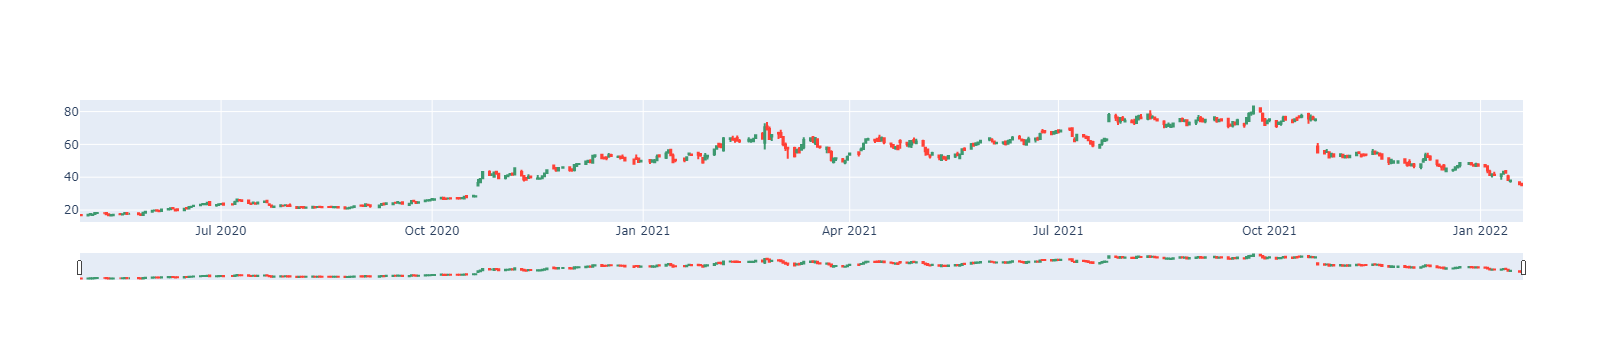

In [337]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df_ticker.index,
                open=df_ticker.SNAP.open,
                high=df_ticker.SNAP.high,
                low=df_ticker.SNAP.low,
                close=df_ticker.SNAP.close)])

fig.show()

In [317]:
df_ticker.SNAP.close

time
2020-05-01 00:00:00-04:00    16.7900
2020-05-04 00:00:00-04:00    17.1000
2020-05-05 00:00:00-04:00    17.5050
2020-05-06 00:00:00-04:00    17.3200
2020-05-07 00:00:00-04:00    18.1300
                              ...   
2022-01-12 00:00:00-05:00    42.7300
2022-01-13 00:00:00-05:00    38.3684
2022-01-14 00:00:00-05:00    38.0300
2022-01-18 00:00:00-05:00    35.7400
2022-01-19 00:00:00-05:00    35.0500
Name: close, Length: 434, dtype: float64